In [10]:
from discopy.frobenius import Ty, Box, Id, Functor, Swap, Spider, Cup, Cap

d = Ty("δ")
e = Ty("ε")
z = Ty("ζ")

delta = Spider(2, 1, d)
epsilon = Spider(1, 0, e)
zeta = Spider(2, 1, z)

F = Functor(lambda ob: ob, {
    Box("inactive", d, d): Id(d),
    Box("inactive", d, e): Box("inactive", d, e),
    Box("inactive", d, z): Box("inactive", d, z),
    Box("inactive", e, d): Box("inactive", e, d),
    Box("inactive", e, e): Id(e),
    Box("inactive", e, z): Box("inactive", e, z),
    Box("inactive", z, d): Box("inactive", z, d),
    Box("inactive", z, e): Box("inactive", z, e),
    Box("inactive", z, z): Id(z),
    Box("active", d, d): Id(d),
    Box("active", d, e): delta[::-1] >> Box("inactive", d, e) @ Box("inactive", d, e) >> Spider(2, 1, e),
    Box("active", d, z): delta[::-1] >> delta[::-1] @ delta[::-1] >> Box("inactive", d, z) @ Box("inactive", d, z) @ Box("inactive", d, z) @ Box("inactive", d, z) >> zeta @ zeta >> zeta,
    Box("active", e, d): Box("inactive", e, d),
    Box("active", e, e): epsilon >> epsilon[::-1],
    Box("active", e, z): Box("inactive", e, z),
    Box("active", z, d): zeta[::-1] >> zeta[::-1] @ zeta[::-1] >> Box("inactive", z, d) @ Box("inactive", z, d) @ Box("inactive", z, d) @ Box("inactive", z, d) >> delta @ delta >> delta,
    Box("active", z, e): zeta[::-1] >> Box("inactive", z, e) @ Box("inactive", z, e) >> Spider(2, 1, e),
    Box("active", z, z): Id(z),
})


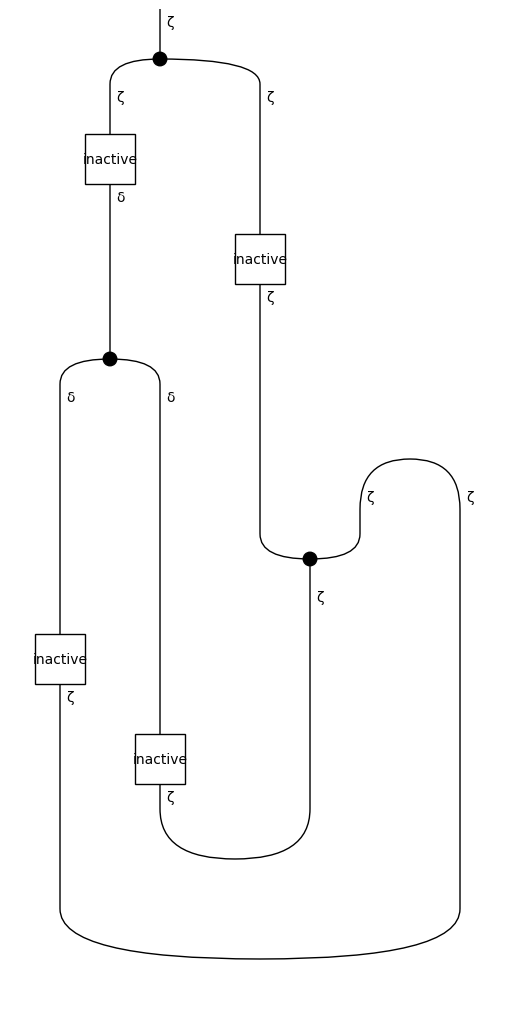

In [11]:
# https://zicklag.katharos.group/blog/interaction-nets-combinators-calculus/

lxx = zeta[::-1] >> \
    Box("inactive", z, d) @ Box("inactive", z, z) >> \
    delta[::-1] @ (z @ Cap(z, z) >> zeta @ z) >> \
    Box("inactive", d, z) @ Box("inactive", d, z) @ z @ z >> \
    z @ Cup(z, z) @ z >> \
    Cup(z, z)
ex1 = lxx
ex1.draw()

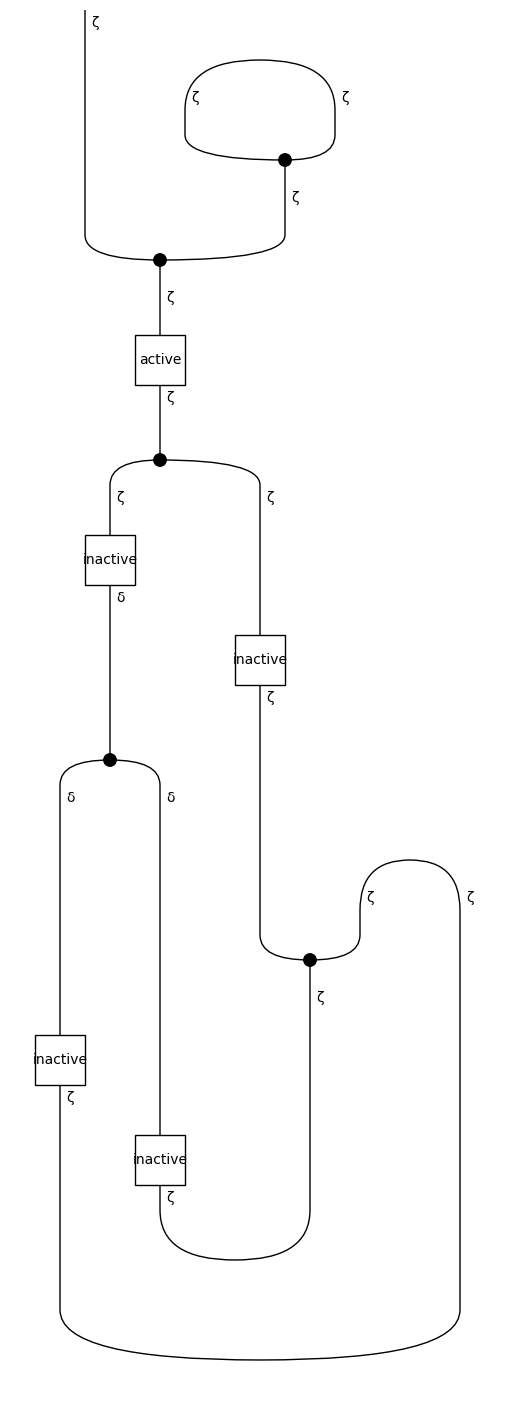

In [12]:
lx = z @ Cap(z, z) >> \
    z @ zeta >> \
    zeta
ex2 = lx >> Box("active", z, z) >> lxx
ex2.draw()

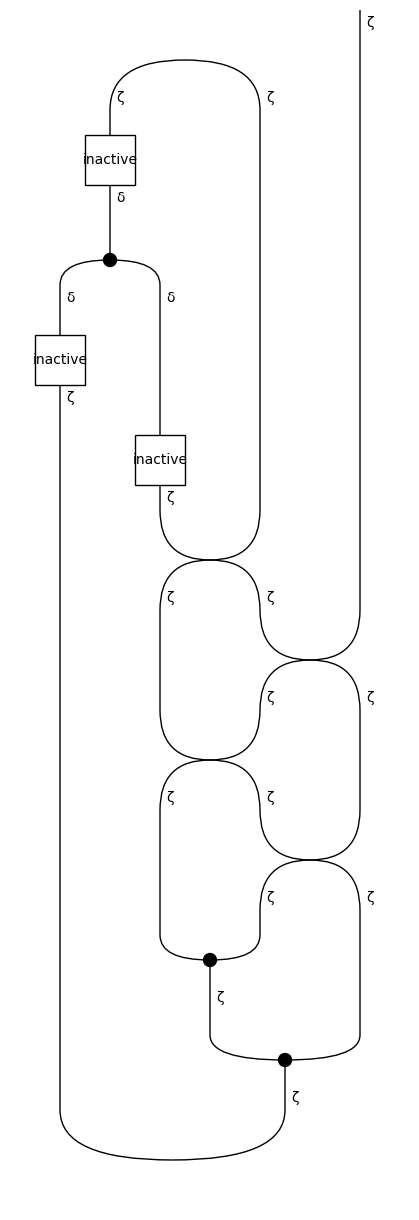

In [26]:
# 1. simplify creating n-ary spiders
# 2. unfuse to go back to original category without them
# F2 = Functor(lambda ob: Ty(""), lambda ar: Spider(len(ar.dom), len(ar.cod), Ty("")))
F(ex2).simplify().unfuse().draw()

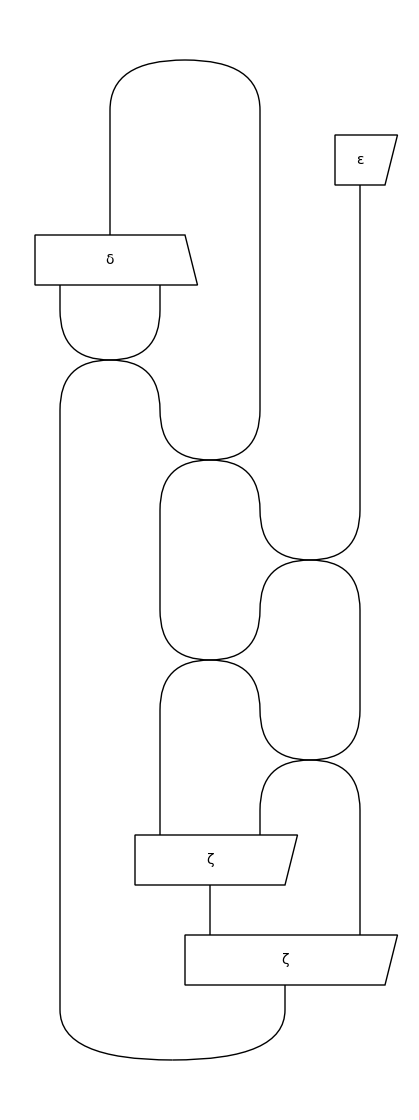

In [18]:
# with the dual
delta_box = Box(d.name, Ty(""), Ty("") @ Ty(""))
epsilon_box = Box(e.name, Ty(""), Ty())
zeta_box = Box(z.name, Ty(""), Ty("") @ Ty(""))

ex3 = Cap(Ty(""), Ty("")) @ epsilon_box[::-1] >> \
    delta_box @ Ty("") @ Ty("") >> \
    Swap(Ty(""), Ty("")) @ Ty("") @ Ty("") >> \
    Ty("") @ Swap(Ty(""), Ty("")) @ Ty("") >> \
    Ty("") @ Ty("") @ Swap(Ty(""), Ty("")) >> \
    Ty("") @ Swap(Ty(""), Ty("")) @ Ty("") >> \
    Ty("") @ Ty("") @ Swap(Ty(""), Ty("")) >> \
    Ty("") @ zeta_box[::-1] @ Ty("") >> \
    Ty("") @ zeta_box[::-1] >> \
    Cup(Ty(""), Ty(""))
ex3.draw()